# **Working with DF (DataFrame)**

**`Udemy Course: Best Hands-on Big Data Practices and Use Cases using PySpark`**

**`Author: Amin Karami (PhD, FHEA)`**

---

**DataFrame (DF)**: Schema (named columns) + declarative language. A DataFrame is a Dataset organized into named columns. It is conceptually equivalent to a table in a relational database. DataFrames can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases, or existing RDDs. It is very efficient for strucutred data.

source: https://spark.apache.org/docs/latest/sql-programming-guide.html

source: https://spark.apache.org/docs/latest/api/python/reference/

El uso de RDD está mas orientado a datos no estructurados y se procesan con python, su principal enfoque es como ('How') obtener datos. El uso de DF está orientado a datos estructurados y se procesan con lenguaje SQL, su principal enfoque es que ('What') datos obtener.

Para trabajar con Dataframes, se necesita un SparkContext y un SQLContext, ambos se logran instanciar con una SparkSession.

### DF Operations ###

- Dataframe Standalone Operations: Refers to transfomations similar to RDD's with dataframe functions like select, where/filter, groupby, having, join... there also exists only one action, show(). These operations has no optimization, the next two types of operations are better for seeking efficiency based on CPU and memory use. These operations are not recomended.

- Spark SQL: These are better optimized than standalone operations
- User Defined Functions (UDF): Similar to Spark SQL, this way, you are able to implement specific functions that are not available in Spark SQL operations

### **Como se optimizan las operaciones Spark SQL and UDF?**

Hay dos técnicas de optimización. **Catalyst Query Optimization** que se basa en rule cost optimization y **Project Tungsten** que se base en aspectos como el manejo de la memoria, cache y generacion de código con compiladores modernos *(INVESTIGAR MAS, no se si lo traduje bien)*

In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

In [ ]:
########## ONLY in Ubuntu Machine ##########
# Load Spark engine
# !pip3 install -q findspark
# import findspark
# findspark.init()
########## ONLY in Ubuntu Machine ##########

In [1]:
# Linking with Spark (https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html)
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

spark

# **Part 1: Create DF and Basic Operations**

In [3]:
# Create/Load DF: (Spark automatically scans through the files and infers the schema of the dataset)
# data source: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

df1 = spark.read.format("csv").load("7 - CompleteDataset.csv", inferSchema=True, header=True)

In [ ]:
# Show data:
df1.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
# How many partitions in DF?
"""la funcion getNumPartitions se aplica sobre RDD's. por lo tanto, hay que
convertir el dataframe en rdd antes de poder utilizar la funcion"""
df1.rdd.getNumPartitions()

2

In [4]:
# Increase/Desrease the partitions in DF
"""En este caso, para cambiar el numero de particiones, no es necesario
convertirlo a rdd, para conocer el numero de particiones si"""
df2 = df1.repartition(4)
df2.rdd.getNumPartitions()

4

In [ ]:
# Show DF
df2.show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  _c0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [ ]:
# Rename Columns and Amend NULLs:
df2 = df2.withColumnRenamed("_c0", "ID") \
    .withColumnRenamed("Ball control", "Ball_Control")\
    .withColumnRenamed("Sliding tackle", "Sliding_Tackle")

df2.na.fill({"RAM": 10, "RB": 1}).show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [ ]:
# Transformation (SELECT): remenber, these are not recomended DF operations
df2.select("Name","Overall").distinct().show()

+------------------+-------+
|              Name|Overall|
+------------------+-------+
|        E. Horvath|     71|
|        M. Randall|     62|
|      A. Granqvist|     80|
|       A. Thompson|     65|
|    R. Cornthwaite|     66|
|         G. Zajkov|     62|
|       J. Cuadrado|     82|
|           M. Dube|     63|
|      A. Al Asmari|     62|
|           T. Aoki|     64|
|        M. Edwards|     58|
|           L. Amos|     60|
|       S. Kawamata|     56|
|A. Taylor-Sinclair|     60|
|       A. Bouchard|     60|
|        J. Cortizo|     58|
|     Fran Villalba|     70|
|         V. Lazaro|     71|
|         Guillermo|     70|
|         T. Ayasse|     68|
+------------------+-------+
only showing top 20 rows



In [ ]:
# Transformation (FILTER): remenber, these are not recomended DF operations
df2.filter(df2["Overall"] > 70).show()

+----+------------+---+--------------------+-------------------+--------------------+-------+---------+--------------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  ID|        Name|Age|               Photo|        Nationality|                Flag|Overall|Potential|                Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

In [ ]:
# Transformation (FILTER): remenber, these are not recomended DF operations
# where and filter functions are the same
df2.select("Overall", "Name", "Age").where(df2["Overall"]>70).show()

+-------+------------------+---+
|Overall|              Name|Age|
+-------+------------------+---+
|     81|      R. Guerreiro| 23|
|     72|         A. Benali| 25|
|     87|          A. Vidal| 30|
|     71|     Marlion Rolim| 25|
|     71|         I. Hayden| 22|
|     71|      P. Rodríguez| 27|
|     73|        T. Carroll| 25|
|     76|        G. Mercado| 30|
|     83|         K. Walker| 27|
|     71|            Martos| 33|
|     71|    Martin Cordeia| 33|
|     73|              Tito| 31|
|     71|K. Vandendriessche| 27|
|     78|           Muniain| 24|
|     75|    Allan Bardinho| 25|
|     72|   A. Martín Arias| 24|
|     71|       M. Albornoz| 26|
|     71|       V. Fayzulin| 31|
|     74|          C. Obasi| 31|
|     74|      G. Karadeniz| 37|
+-------+------------------+---+
only showing top 20 rows



In [ ]:
# Transformation (FILTER): remenber, these are not recomended DF operations
df2.where(df2["Overall"]>70).groupBy("Age").count().sort("Age").show()

+---+-----+
|Age|count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



<Axes: xlabel='Age'>

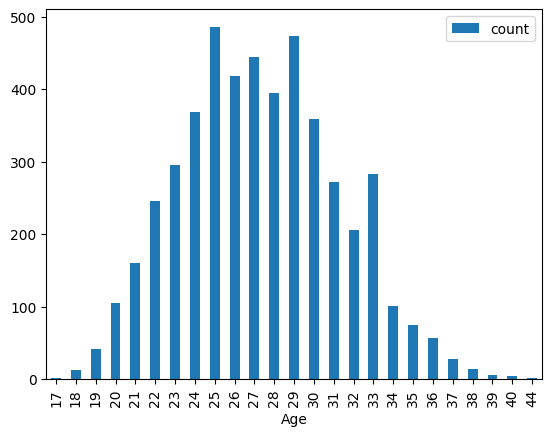

In [ ]:
# Visualize the results:
df2_result = df2.where(df2["Overall"]>70).groupBy("Age").count().sort("Age")

pandas_df = df2_result.toPandas()
pandas_df.plot(x = "Age", y = "count", kind = "bar")


<Axes: xlabel='Age'>

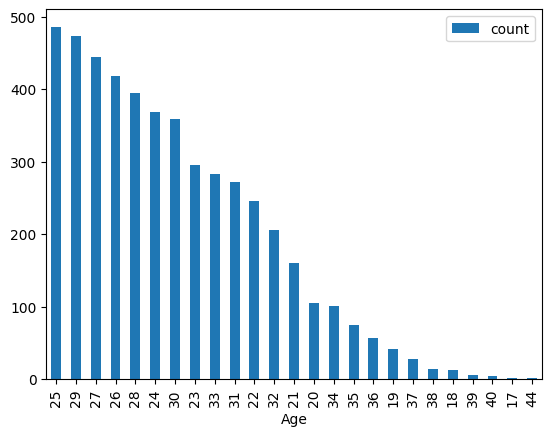

In [ ]:
pandas_df.sort_values(by="count", ascending=False).plot(x = "Age", y = "count", kind = "bar")

# **Part 2: Advanced DF Operations: Spark SQL and UDF**

In [5]:
# Spark SQL (Register the DF using a local temporary view):
# primer paso para poder utilizar lenguaje sql con spark
df2.createOrReplaceTempView("df_football")

In [6]:
# SQL Query:

sql_query = """ SELECT Age, count(*) as Count
                FROM df_football
                WHERE Overall > 70
                GROUP BY Age
                ORDER BY Age """

result = spark.sql(sql_query)
result.show()

+---+-----+
|Age|Count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



In [12]:
# UDF (User Defined Functions):
def uppercase_converter(record):
  if len(record) > 10:
    return record.upper()
  else:
    return record.lower()

# register the DF
df2.createOrReplaceTempView("UDF_football")

# register the function
spark.udf.register("UPPER", uppercase_converter)

# use the UDF in SQL
sql_query = "SELECT Age, UPPER(Name) as Name, UPPER(Club) as Club FROM UDF_football"

result = spark.sql(sql_query)
result.show()


+---+-----------------+--------------------+
|Age|             Name|                Club|
+---+-----------------+--------------------+
| 26|         v. moren|    WAASLAND-BEVEREN|
| 33|        c. agoste|UNIVERSIDAD CATÓLICA|
| 19|    STEVEN PRIETO|         REAL OVIEDO|
| 21|        c. alemán|ESTUDIANTES DE LA...|
| 27|       p. wiegers|   SG DYNAMO DRESDEN|
| 26|     H. YAMAGUCHI|        CEREZO OSAKA|
| 29|    D. MCGOLDRICK|        IPSWICH TOWN|
| 24|       r. teibert|VANCOUVER WHITECA...|
| 20|          i. radu|            avellino|
| 28|   P. ABRAHAMSSON|           bk häcken|
| 21|       c. burgess|   SCUNTHORPE UNITED|
| 31|            galán|      RAYO VALLECANO|
| 25|       r. andrero|      AUDAX ITALIANO|
| 31|         m. topal|       FENERBAHÇE SK|
| 23|        l. moneta|      LEGIA WARSZAWA|
| 21|        t. szántó|       SK RAPID WIEN|
| 23|          y. njie|         BOAVISTA FC|
| 20|     AARÓN MARTÍN|        RCD ESPANYOL|
| 23|K. FRIESENBICHLER|     FK AUSTRIA WIEN|
| 20|     